In [1]:
import imdb
from imdb import IMDb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (3, 3)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.facecolor'] = 'w'

In [3]:
# create an instance of the IMDb class
ia = IMDb()

In [4]:
# read list of ratings
df_ratings = pd.read_csv('../data/IMDB_Top250_UID_title_rating.csv')
df_ratings.head()

,UID,Title,Rating
0,111161,The Shawshank Redemption,9.3
1,68646,The Godfather,9.2
2,71562,The Godfather: Part II,9.0
3,468569,The Dark Knight,9.0
4,50083,12 Angry Men,8.9


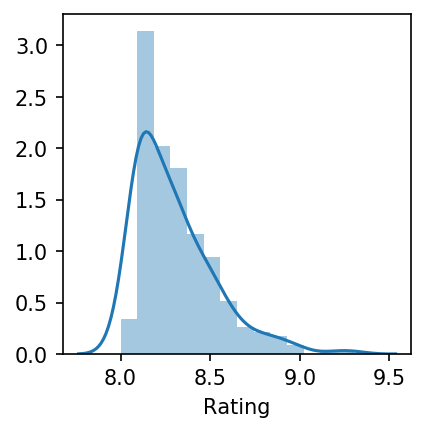

In [5]:
# histogram of ratings
sns.distplot(df_ratings.Rating)
plt.show()

In [6]:
# binarize the Ratings
df_ratings.Rating.describe()

count    250.000000
mean       8.298400
std        0.226545
min        8.000000
25%        8.100000
50%        8.200000
75%        8.400000
max        9.300000
Name: Rating, dtype: float64

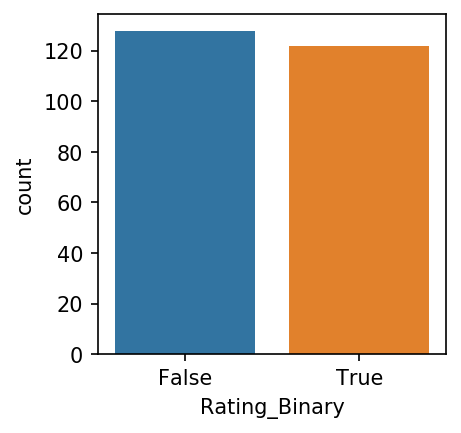

In [7]:
# create new column
df_ratings.loc[:, 'Rating_Binary'] = df_ratings.Rating > 8.2
sns.countplot(df_ratings.Rating_Binary)
plt.show()

# Search by Title, Year

In [8]:
help(ia.search_movie)

Help on method search_movie in module imdb:

search_movie(title, results=None, _episodes=False) method of imdb.parser.http.IMDbHTTPAccessSystem instance
    Return a list of Movie objects for a query for the given title.
    The results argument is the maximum number of results to return.



In [9]:
ia = IMDb()
movies = ia.search_movie('lord of the rings')

In [10]:
movies = ia.search_movie('lord of the rings')
movies

[<Movie id:0120737[http] title:_The Lord of the Rings: The Fellowship of the Ring (2001)_>,
 <Movie id:7631058[http] title:_"The Lord of the Rings" (None)_>,
 <Movie id:0154789[http] title:_Lord of the Rings (1990) (VG)_>,
 <Movie id:8306578[http] title:_"Lord of the Rings 1x01" (2014)_>,
 <Movie id:6482606[http] title:_Lord of the Rings (By Spring) (2017)_>,
 <Movie id:0974590[http] title:_The Lord of the Rings Online (2007) (VG)_>,
 <Movie id:0392354[http] title:_Lord of the Rings: Game One (1986) (VG)_>,
 <Movie id:9630166[http] title:_Lord of the Rings by George Lucas (2003)_>,
 <Movie id:0077869[http] title:_The Lord of the Rings (1978)_>,
 <Movie id:0167260[http] title:_The Lord of the Rings: The Return of the King (2003)_>,
 <Movie id:0167261[http] title:_The Lord of the Rings: The Two Towers (2002)_>,
 <Movie id:9144676[http] title:_The Lord of the Rings (2017) (V)_>,
 <Movie id:2502200[http] title:_"Raising Hope" Lord of the Ring (2013)_>,
 <Movie id:3882488[http] title:_"E:60

In [11]:
for movie in movies:
    if 'year' in movie.keys():
        print(movie['year'])
    else:
        print('No year!')

2001
No year!
1990
2014
2017
2007
1986
2003
1978
2003
2002
2017
2013
2009
2008
2019
2012
2002
1971
2002


# Acquire Features

In [13]:
# define function that searches for movie
def search_title_get_first_movie(title):
    """returns first movie in search results"""
    # create an instance of the IMDb class
    ia = IMDb()
    movies = ia.search_movie(title)
    first_id = movies[0].movieID
    movie = ia.get_movie(first_id)
    return(movie)

In [14]:
test_movie = ia.get_movie(df_ratings.UID[0])
test_movie

<Movie id:0111161[http] title:_The Shawshank Redemption (1994)_>

In [42]:
sorted(test_movie.keys())

['akas',
 'art department',
 'art directors',
 'aspect ratio',
 'assistant directors',
 'box office',
 'camera department',
 'canonical title',
 'cast',
 'casting department',
 'casting directors',
 'certificates',
 'cinematographers',
 'color info',
 'composers',
 'costume departmen',
 'costume designers',
 'countries',
 'country codes',
 'cover url',
 'director',
 'directors',
 'distributors',
 'editorial department',
 'editors',
 'full-size cover url',
 'genres',
 'kind',
 'language codes',
 'languages',
 'location management',
 'long imdb canonical title',
 'long imdb title',
 'make up department',
 'miscellaneous',
 'music department',
 'original air date',
 'other companies',
 'plot',
 'plot outline',
 'producers',
 'production companies',
 'production designers',
 'production managers',
 'rating',
 'runtimes',
 'script department',
 'set decorators',
 'smart canonical title',
 'smart long imdb canonical title',
 'sound department',
 'sound mix',
 'special effects',
 'special eff

In [15]:
# # test
# test_movie = search_title_get_first_movie('Avengers')
# test_movie

In [16]:
test_movie['box office']['Budget']

'$25,000,000 (estimated)'

In [17]:
test_movie['box office']['Cumulative Worldwide Gross']

'$58,500,000'

In [18]:
# test_movie['cast'][:5]

In [19]:
test_movie['countries']

['United States']

In [20]:
test_movie['directors']

[<Person id:0001104[http] name:_Frank Darabont_>]

In [21]:
test_movie['genres']

['Drama']

In [22]:
test_movie['runtimes']

['142']

In [43]:
test_movie['rating']

9.3

In [24]:
test_movie['title']

'The Shawshank Redemption'

In [25]:
test_movie['votes']

2199969

In [26]:
test_movie['writers']

[<Person id:0000175[http] name:_Stephen King_>,
 <Person id:None[http] name:_None_>,
 <Person id:0001104[http] name:_Frank Darabont_>]

In [27]:
test_movie['year']

1994

In [28]:
test_movie['aspect ratio']

'1.85 : 1'

In [44]:
# define list of high-level features
features_hl = ['aspect ratio', 'box office', 'countries', 'directors', 'genres',
               'rating', 'runtimes', 'title', 'votes', 'writers', 'year']

In [45]:
# define list of low-level features
features_ll = {'box office':['Budget', 'Cumulative Worldwide Gross'],
               'countries': [0], 'directors':[0], 'genres': [0, 1, 2],
               'runtimes':[0], 'writers': [0, 1, 2]}

In [62]:
# define function to acquire features
def acquire_features(movie_id, features_hl=features_hl, features_ll=features_ll):
    """returns named list of desired features"""
    # create an instance of the IMDb class
    ia = IMDb()
    movie = ia.get_movie(movie_id)
    result = [movie.movieID]
    names = ['UID']
    # check existence of each high-level feature
    for feature_hl in features_hl:
        if not feature_hl in movie.keys():
            raise ValueError('Feature: %s not found in movie: %s' % (feature_hl, movie_id))
        if not feature_hl in features_ll.keys():
            result.append(movie[feature_hl])
            names.append(feature_hl)
    # obtain low-level features and append to list
    for feature_hl in features_ll:
        feature_object = movie[feature_hl]
        feature_keys = features_ll[feature_hl]
        for key in feature_keys:
            if isinstance(feature_object, dict):
                if not key in feature_object.keys():
                    result.append(np.nan)
                else:
                    result.append(feature_object[key])
                names.append(key)
            else:
                if key>=len(feature_object):
                    result.append(np.nan)
                    names.append(feature_hl)
                elif isinstance(feature_object[key], imdb.Person.Person):
                    if 'name' in feature_object[key].keys():
                        result.append(feature_object[key]['name'])
                    else:
                        result.append(np.nan)
                    names.append(feature_hl)
                else:
                    result.append(feature_object[key])
                    names.append(feature_hl)
    result = pd.Series(result)
    result.index = names
    return result

In [47]:
acquire_features('0120737')

aspect ratio                                                           2.40 : 1
rating                                                                      8.8
title                         The Lord of the Rings: The Fellowship of the Ring
votes                                                                   1575671
year                                                                       2001
Budget                                                  $93,000,000 (estimated)
Cumulative Worldwide Gross                            $871,530,324, 25 Nov 2011
countries                                                           New Zealand
directors                                                         Peter Jackson
genres                                                                   Action
genres                                                                Adventure
genres                                                                    Drama
runtimes                                

In [38]:
acquire_features(df_ratings.UID[0])

aspect ratio                                  1.85 : 1
title                         The Shawshank Redemption
votes                                          2199969
year                                              1994
Budget                         $25,000,000 (estimated)
Cumulative Worldwide Gross                 $58,500,000
countries                                United States
directors                               Frank Darabont
genres                                           Drama
genres                                             NaN
genres                                             NaN
runtimes                                           142
writers                                   Stephen King
writers                                            NaN
writers                                 Frank Darabont
dtype: object

In [39]:
acquire_features(df_ratings.UID[1])

aspect ratio                  1.37 : 1 (negative ratio)
title                                     The Godfather
votes                                           1515783
year                                               1972
Budget                           $6,000,000 (estimated)
Cumulative Worldwide Gross                 $245,066,411
countries                                 United States
directors                          Francis Ford Coppola
genres                                            Crime
genres                                            Drama
genres                                              NaN
runtimes                                            175
writers                                      Mario Puzo
writers                            Francis Ford Coppola
writers                                             NaN
dtype: object

In [40]:
acquire_features(df_ratings.UID[123])

aspect ratio                  2.20 : 1 (70 mm prints)
title                                        Die Hard
votes                                          750935
year                                             1988
Budget                        $28,000,000 (estimated)
Cumulative Worldwide Gross               $140,767,956
countries                               United States
directors                              John McTiernan
genres                                         Action
genres                                       Thriller
genres                                            NaN
runtimes                                          132
writers                                Roderick Thorp
writers                                           NaN
writers                                    Jeb Stuart
dtype: object

In [63]:
for i in [0, 3, 4, 5]:
    result = acquire_features(df_ratings.UID[i])
    if i==0:
        df_results = result.to_frame().T
    else:
        df_result = result.to_frame().T
        df_results = pd.concat((df_results, df_result), sort=False, ignore_index=True)

In [64]:
df_results

,UID,aspect ratio,rating,title,votes,year,Budget,Cumulative Worldwide Gross,countries,directors,genres,genres,genres,runtimes,writers,writers,writers
0,0111161,1.85 : 1,9.3,The Shawshank Redemption,2199969,1994,"$25,000,000 (estimated)","$58,500,000",United States,Frank Darabont,Drama,NaN,NaN,142,Stephen King,NaN,Frank Darabont
1,0468569,1.43 : 1 (70mm IMAX - some scenes),9,The Dark Knight,2181671,2008,"$185,000,000 (estimated)","$1,004,558,444, 19 Jul 2012",United States,Christopher Nolan,Action,Crime,Drama,152,Jonathan Nolan,Christopher Nolan,NaN
2,0050083,1.66 : 1,8.9,12 Angry Men,642237,1957,"$350,000 (estimated)",NaN,United States,Sidney Lumet,Drama,NaN,NaN,96,Reginald Rose,NaN,Reginald Rose
3,0108052,1.33 : 1 (negative ratio),8.9,Schindler's List,1148113,1993,"$22,000,000 (estimated)","$221,000,000",United States,Steven Spielberg,Biography,Drama,History,195,Thomas Keneally,NaN,Steven Zaillian
